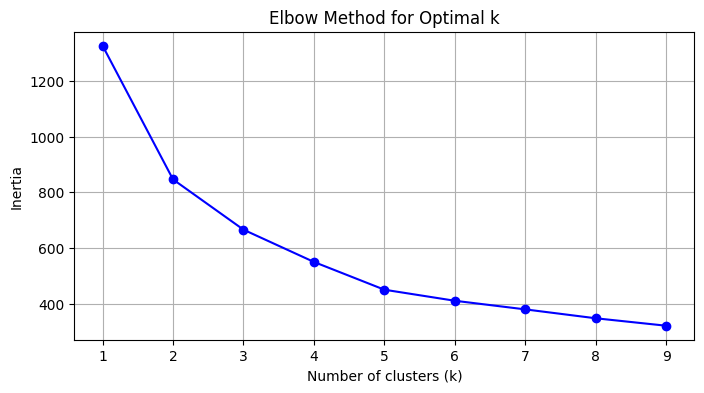

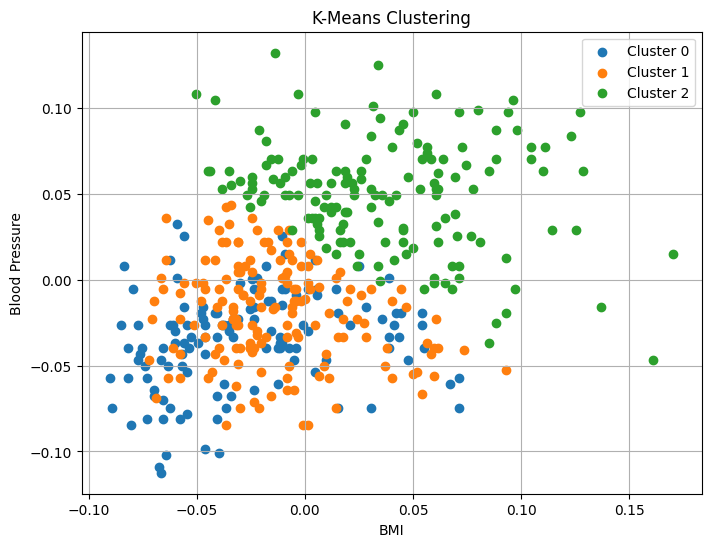

Deduplicated Records (One representative per cluster):
        age       sex       bmi        bp        s1        s2        s3  \
0 -0.063635 -0.044642 -0.033151 -0.033213  0.001183  0.024051 -0.024993   
1  0.012648 -0.044642 -0.020218 -0.015999  0.012191  0.021233 -0.076536   
2  0.012648  0.050680  0.035829  0.049415  0.053469  0.074155 -0.069172   

         s4        s5        s6  target  
0 -0.002592 -0.022517 -0.059067   214.0  
1  0.108111  0.059879 -0.021788   233.0  
2  0.145012  0.045604  0.048628   248.0  


In [10]:
# Deduplication Using K-Means Clustering

# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Step 2: Load the Diabetes Dataset
diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# Step 3: Select Features for Analysis
selected_features = ['age', 'bmi', 'bp']
df = data[selected_features].copy()

# Step 4: Standardize the Features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Step 5: Determine Optimal Number of Clusters using Elbow Method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Based on the elbow plot, choose the optimal number of clusters
optimal_k = 3  # Adjust this based on the elbow plot

# Step 6: Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_

# Step 7: Identify Representative Records (Deduplication)
# For each cluster, find the record closest to the centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df_scaled)
deduplicated_data = data.iloc[closest].reset_index(drop=True)

# Step 8: Visualize Clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['bmi'], cluster_data['bp'], label=f'Cluster {cluster}')
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Output Deduplicated Records
print("Deduplicated Records (One representative per cluster):")
print(deduplicated_data)